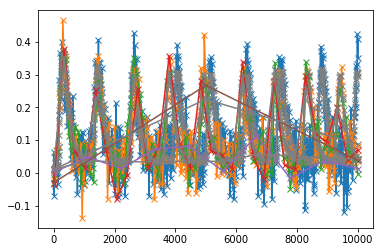

In [1]:
import pyabc
from study_abc_noise.model import HodgkinHuxleyModelVars as ModelVars
import matplotlib.pyplot as plt
import numpy as np
import os
import logging
import pickle
%matplotlib inline

# for debugging
for module in ['Distance', 'Acceptor', 'Epsilon']:
    logger = logging.getLogger(module)
    logger.setLevel(logging.DEBUG)
    fh = logging.FileHandler('log/logger_laplace.log')
    fh.setLevel(logging.DEBUG)
    logger.addHandler(fh)

arr_n_t = [3, 10, 30, 100, 300, 1000]

# create data
for n_t in reversed(arr_n_t):
    fn = f"data/data_{n_t}.p"
    mv = ModelVars(n_t=n_t, basedir='..')
    if not os.path.isfile(fn):
        print(f"generate data for time {n_t}")
        data_exact = mv.get_model()(mv.p_true)
        data = mv.add_noise_to_data(data_exact)
        pickle.dump((data_exact, data), open(fn, "wb"))
    data_exact, data = pickle.load(open(fn, "rb"))
    plt.plot(mv.get_obs_times(), data['K'], 'x-')
    plt.plot(mv.get_obs_times(), data_exact['K'], 'x-', color='grey')

In [4]:
# proposed method

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t, basedir='..')
    fb = f"hh_{n_t}_stochacc"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(min_acceptance_rate=1e-3)
    print()

INFO:History:Start <ABCSMC(id=1, start_time=2019-12-20 22:41:36.972064, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=8.5361e+02 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [1826.9562042303337].
INFO:ABC:t: 0, eps: 1826.9562042303337.
DEBUG:Acceptor:Encountered pd=9.2166e+02 > c=8.5361e+02, thus weight=1.0380e+00.
DEBUG:Acceptor:Encountered pd=1.0385e+03 > c=8.5361e+02, thus weight=1.1065e+00.
INFO:ABC:Acceptance rate: 1000 / 3379 = 2.9595e-01, ESS=9.9999e+02.
DEBUG:Acceptor:pdf_norm=1.0385e+03 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [1811.7275579557718, 913.4781021151668].
INFO:ABC:t: 1, eps: 913.4781021151668.
DEBUG:Acceptor:Encountered pd=1.0826e+03 > c=1.0385e+03, thus weight=1.0495e+00.
INFO:ABC:Acceptance rate: 1000 / 9747 = 1.0260e-01, ESS=8.3381e+02.
DEBUG:Acceptor:pdf_norm=1.0826e+03 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [1773.5987236621804, 456.7390510575834].
INFO:ABC:t: 2, eps: 456.7390510575834.
DEBUG:Acce

KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run(

  File "/home/icb/yannik.schaelte/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 116, in simulate
    stdout=subprocess.PIPE)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 679, in _evaluate_proposal
    x_0)
  File "/home/icb/yannik.schaelte/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 116, in simulate
    stdout=subprocess.PIPE)
  File "/home/icb/yannik.schaelte/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 55, in model
    val = simulate(**p, executable=self.executable)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/subprocess.py", line 466, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/subprocess.py", line 769, in __init__
    restore_signals, start_new_session)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth

  File "/home/icb/yannik.schaelte/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 116, in simulate
    stdout=subprocess.PIPE)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/subprocess.py", line 466, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/subprocess.py", line 769, in __init__
    restore_signals, start_new_session)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/subprocess.py", line 1447, in _execute_child
    restore_signals, start_new_session, preexec_fn)
KeyboardInterrupt
Traceback (most recent call last):
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/sampler/multi

  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 594, in simulate_one
    weight_function)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 679, in _evaluate_proposal
    x_0)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/model.py", line 227, in accept
    sum_stats_calculator)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/icb/yannik.schaelte/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 55, in model
    val = simulate(**p, executable=self.executable)
  File "/home/icb/yannik.schaelte/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 116, in simulate
    stdout=subprocess.PIPE)
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/subprocess.py", line 466, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/h

  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/subprocess.py", line 1447, in _execute_child
    restore_signals, start_new_session, preexec_fn)
KeyboardInterrupt
Process Process-1098:
Traceback (most recent call last):
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/icb/yannik.schaelte/anaconda37_amdsth/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 32, in work
    new_sim = simulate_one()
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 594, in simulate_one
    weight_function)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/smc.py", line 679, in _evaluate_proposal
    x_0)
  File "/home/icb/yannik.schaelte/pyabc/pyabc/model.py", line 227, in accept
    sum_stats_calculator)
  File "/home/icb/yannik.schaelte/p

In [ ]:
# sequential but bad c

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t, basedir='..')
    fb = f"hh_{n_t}_stochacc_badc"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                          log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(min_acceptance_rate=1e-3)
    print()

INFO:History:Start <ABCSMC(id=1, start_time=2019-12-21 09:53:07.928166, end_time=None)>
DEBUG:Acceptor:pdf_norm=6.2304e+00 for t=0.
INFO:ABC:Calibration sample before t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [5.168418529083969].
INFO:ABC:t: 0, eps: 5.168418529083969.
INFO:ABC:Acceptance rate: 1000 / 3217 = 3.1085e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=6.2304e+00 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [3.890648237152878, 2.5842092645419843].
INFO:ABC:t: 1, eps: 2.5842092645419843.
INFO:ABC:Acceptance rate: 1000 / 4589 = 2.1791e-01, ESS=8.7548e+02.
DEBUG:Acceptor:pdf_norm=6.2304e+00 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [3.3664505727239726, 1.2921046322709921].
INFO:ABC:t: 2, eps: 1.2921046322709921.
INFO:ABC:Acceptance rate: 1000 / 6626 = 1.5092e-01, ESS=7.9640e+02.
DEBUG:Acceptor:pdf_norm=6.2304e+00 for t=3.
DEBUG:Epsilon:Proposed temperatures for 3: [2.928470299849566, 0.6460523161354961].
INFO:ABC:t: 3, eps: 1.0.
INFO:ABC:Acceptance rate: 1000 

INFO:History:Start <ABCSMC(id=1, start_time=2019-12-21 10:21:30.906643, end_time=None)>
DEBUG:Acceptor:pdf_norm=2.0768e+01 for t=0.
INFO:ABC:Calibration sample before t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [11.035956147301704].
INFO:ABC:t: 0, eps: 11.035956147301704.
INFO:ABC:Acceptance rate: 1000 / 3305 = 3.0257e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=2.0768e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [8.270513853392115, 5.517978073650852].
INFO:ABC:t: 1, eps: 5.517978073650852.
INFO:ABC:Acceptance rate: 1000 / 5075 = 1.9704e-01, ESS=8.1541e+02.
DEBUG:Acceptor:pdf_norm=2.0768e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [7.465542891595319, 2.758989036825426].
INFO:ABC:t: 2, eps: 2.758989036825426.
INFO:ABC:Acceptance rate: 1000 / 7741 = 1.2918e-01, ESS=7.5228e+02.
DEBUG:Acceptor:pdf_norm=2.0768e+01 for t=3.
DEBUG:Epsilon:Proposed temperatures for 3: [5.835147003753775, 1.379494518412713].
INFO:ABC:t: 3, eps: 1.379494518412713.
INFO:ABC:Acceptance r

INFO:History:Start <ABCSMC(id=1, start_time=2019-12-21 12:04:28.650134, end_time=None)>
DEBUG:Acceptor:pdf_norm=6.2304e+01 for t=0.
INFO:ABC:Calibration sample before t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [89.77816613150567].
INFO:ABC:t: 0, eps: 89.77816613150567.
INFO:ABC:Acceptance rate: 1000 / 3247 = 3.0798e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=6.2304e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [78.78402990119841, 44.889083065752835].
INFO:ABC:t: 1, eps: 44.889083065752835.
INFO:ABC:Acceptance rate: 1000 / 6765 = 1.4782e-01, ESS=8.7550e+02.
DEBUG:Acceptor:pdf_norm=6.2304e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [67.7232775533778, 22.444541532876418].
INFO:ABC:t: 2, eps: 22.444541532876418.
INFO:ABC:Acceptance rate: 1000 / 13562 = 7.3735e-02, ESS=7.5226e+02.
DEBUG:Acceptor:pdf_norm=6.2304e+01 for t=3.
DEBUG:Epsilon:Proposed temperatures for 3: [50.52824941485628, 11.222270766438209].
INFO:ABC:t: 3, eps: 11.222270766438209.
INFO:ABC:Acceptan

In [ ]:
# rejection with adaptive c (in general not applicable)

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t, basedir='..')
    fb = f"hh_{n_t}_rejection"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(max_nr_populations=1, min_acceptance_rate=1e-3)
    print()

In [ ]:
# rejection with bad (but correct) c

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t, basedir='..')
    fb = f"hh_{n_t}_rejection_badc"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                          log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
    )
    data = pickle.load(open(f"data/data_{n_t}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(max_nr_populations=1, min_acceptance_rate=1e-3)
    print()

In [ ]:
# noisy model

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t, basedir='..')
    fb = f"hh_{n_t}_noisymodel"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model_noisy(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_distance(),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(min_acceptance_rate=1e-3)
    print()

DEBUG:Epsilon:init quantile_epsilon initial_epsilon=from_sample, quantile_multiplier=1
INFO:History:Start <ABCSMC(id=1, start_time=2019-12-23 15:01:24.761181, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 0.6745999478654449
INFO:ABC:t: 0, eps: 0.6745999478654449.
INFO:ABC:Acceptance rate: 1000 / 2013 = 4.9677e-01, ESS=1.0000e+03.
DEBUG:Epsilon:new eps, t=1, eps=0.5200421935391828
INFO:ABC:t: 1, eps: 0.5200421935391828.
INFO:ABC:Acceptance rate: 1000 / 2776 = 3.6023e-01, ESS=9.0526e+02.
DEBUG:Epsilon:new eps, t=2, eps=0.41174988385549716
INFO:ABC:t: 2, eps: 0.41174988385549716.
INFO:ABC:Acceptance rate: 1000 / 4120 = 2.4272e-01, ESS=8.3983e+02.
DEBUG:Epsilon:new eps, t=4, eps=0.2055489704335991
INFO:ABC:t: 4, eps: 0.2055489704335991.
INFO:ABC:Acceptance rate: 1000 / 4108 = 2.4343e-01, ESS=9.2048e+02.
DEBUG:Epsilon:new eps, t=5, eps=0.15619358367780214
INFO:ABC:t: 5, eps: 0.15619358367780214.
INFO:ABC:Acceptance rate: 1000 / 4978 = 2.0088e-01, ES